In [17]:
%pylab inline
import pandas as pd
import glob
import seaborn as sns
import pyspiel
import os
import json
sns.set(font_scale=2)

Populating the interactive namespace from numpy and matplotlib


/Users/newmanne/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


No handles with labels found to put in legend.
No handles with labels found to put in legend.


60.98069570083015
60.98069570083015
61.44559554793096
60.98069570083015
61.44559554793096
61.44559554793096
70.34293626614229
70.34293626614229
70.34293626614229


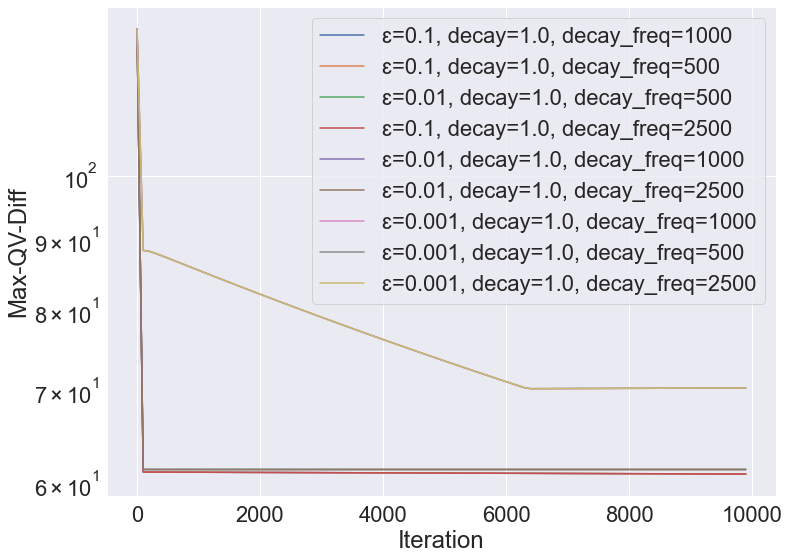

In [65]:
# A database/webapp?

BASE_DIR = '../../../../experiments/medium_no_decay/1/'
plt.figure(figsize=(12,9))
seen = set()

for d in glob.glob(BASE_DIR + '*'):
    if not os.path.isdir(d):
        continue
    with open(f'{d}/solver.json', 'r') as f:
        solver_config = json.load(f)
    df = pd.read_csv(f'{d}/run_metrics.csv')
#    if 'ecfr' in d and solver_config['initial_eps'] not in seen:# and solver_config['decay_factor'] == 0.99:
    if 'ecfr' in d and solver_config['initial_eps'] and solver_config['decay_factor'] == 1:
        seen.add(solver_config['initial_eps'])
#         label = f"ɛ={solver_config['initial_eps']}"
        label = f"ɛ={solver_config['initial_eps']}, decay={solver_config['decay_factor']}, decay_freq={solver_config['decay_freq']}"
        plt.plot(df['iteration'], df['max_qv_diff'], label=label)
        print(df.iloc[-1]['max_qv_diff'])
    plt.xlabel('Iteration')
    plt.ylabel('Max-QV-Diff')
    plt.semilogy()
    plt.legend()

plt.savefig('ecfr.png', dpi=300)

In [56]:
f = './cc/cfr/1/cfr_123'
rs = f'{f}/reduced_strategy.csv'
df = pd.read_csv(rs)

In [54]:
!open $rs

In [84]:
!cat './cc/cfr/5/5.json'
# Likely that p0 is very weak

{"increment": 0.1, "licenses": 3, "opening_price": 100, "undersell_rule": "undersell_standard", "players": [{"type": [{"value": 275, "budget": 475, "prob": 1.0}]}, {"type": [{"value": 150, "budget": 400, "prob": 0.5}, {"value": 300, "budget": 650, "prob": 0.5}]}]}

In [15]:
!ls ./cc/cfr/3/cfr_123/

cfr.log              reduced_strategy.csv
nash_conv.csv        strategy.csv


In [ ]:
def plot_nash_conv(nash_convs):
    plt.figure(figsize=(9,6))
    y = nash_convs
    x = range(len(nash_convs))
    plt.scatter(x,y, label='Nash Conv')
    plt.semilogy()
    plt.ylabel("Nash Conv")
    plt.xlabel("Iteration")

In [111]:
df['type'] = df['value'].astype(str) + 'b' + df['budget'].astype(str)
type_space = []
for player in df['player'].unique():
    type_space.append(df.query(f'player == {player}')['type'].unique())
type_space

[array(['225.0b525.0'], dtype=object),
 array(['150.0b400.0', '300.0b650.0'], dtype=object)]

In [ ]:
# Bar chart: P(game ends on r=)
# TODO: Condition on types?

def round_probs(df):
    df['type'] = df['value'].astype(str) + 'b' + df['budget'].astype(str)
    # TODO: This double counts
    df.query('terminal and player == 0').groupby('round')['prob'].sum().plot(kind='bar')
    plt.ylabel('P(ending on round)')
    plt.xlabel("Round")

9999    7.761727
Name: nash_conv, dtype: float64


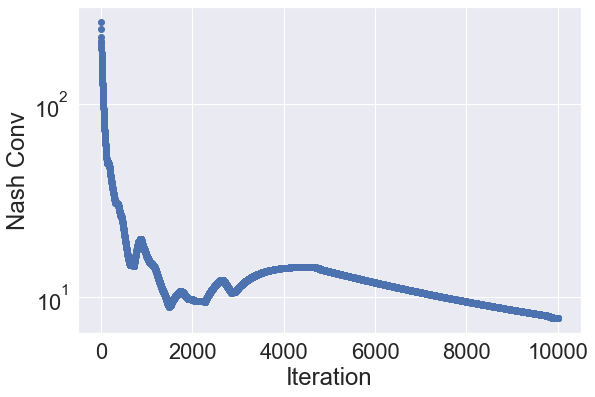

In [99]:
d = './cc/cfr2/2/mccfr_ext_2/'
nc_df = pd.read_csv(f'{d}/nash_conv.csv')

    
plot_nash_conv(nc_df['nash_conv'])
print(nc_df['nash_conv'].tail(1))

In [114]:
# !open $d/reduced_strategy.csv
d = './cc/cfr2/1/cfr_123'

In [115]:
df = pd.read_csv(f'{d}/strategy.csv')
def get_line(n):
    def q(x):
        lines = x.split('\n')
        if len(lines) > n:
            return lines[n]
        else:
            return ''
    return q
types = df.apply(lambda r: get_line(0)(r['info_state']) if not r['terminal'] else get_line(r['player'])(r['info_state']), axis=1)
df['value'] = types.str.extract(r'v(.+)b.*').astype(np.float)
df['budget'] = types.str.extract(r'.*b(.+)$').astype(np.float)



FileNotFoundError: [Errno 2] No such file or directory: './cc/cfr2/1/cfr_123/strategy.csv'

In [101]:

def eu(df, player):
    return df['prob'] @ df[f'Utility {player}']

def ea(df, player):
    return df['prob'] @ df[f'Allocation {player}']

# TODO: You could autogen this by iterating over types
# TODO: Surely you can get Expected Utility of each type straight from OpenSpiel?

expected_utility = eu(df.query('terminal and player == 1 and budget == 400'), 1)
expected_allocation = ea(df.query('terminal and player == 1 and budget == 400'), 1)
print(f'Expected utility is {expected_utility:.2f} and expected allocation is {expected_allocation:.2f} for player 1 type low')
expected_utility = eu(df.query('terminal and player == 1 and budget == 650'), 1)
expected_allocation = ea(df.query('terminal and player == 1 and budget == 650'), 1)
print(f'Expected utility is {expected_utility:.2f} and expected allocation is {expected_allocation:.2f} for player 1 type high')
expected_utility = eu(df.query('terminal and player == 0'), 0)
expected_allocation = ea(df.query('terminal and player == 0'), 0)
print(f'Expected utility is {expected_utility:.2f} and expected allocation is {expected_allocation:.2f} for player 0')



Expected utility is 16.03 and expected allocation is 0.48 for player 1 type low
Expected utility is 157.04 and expected allocation is 0.99 for player 1 type high
Expected utility is 147.13 and expected allocation is 1.52 for player 0


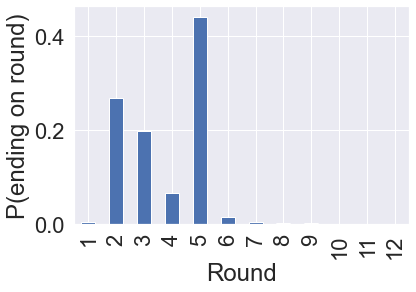

In [102]:

    
round_probs(df)



In [25]:
df.query('terminal and player == 0')

,info_state,Allocation 0,Allocation 1,Bid 0,Bid 1,Bid 2,Bid 3,Utility 0,Utility 1,player,price,prob,round,terminal,value,budget
2,p0v275b475\np1v150b400\nFinal bids: 0 0\nPrice...,0.0,0.0,NaN,NaN,NaN,NaN,0.000,0.0,0,100.000,3.125000e-10,1,True,275.0,475.0
4,p0v275b475\np1v150b400\nFinal bids: 0 1\nPrice...,0.0,1.0,NaN,NaN,NaN,NaN,0.000,50.0,0,100.000,3.283315e-06,1,True,275.0,475.0
6,p0v275b475\np1v150b400\nFinal bids: 0 2\nPrice...,0.0,2.0,NaN,NaN,NaN,NaN,0.000,100.0,0,100.000,4.966302e-06,1,True,275.0,475.0
8,p0v275b475\np1v150b400\nFinal bids: 0 3\nPrice...,0.0,3.0,NaN,NaN,NaN,NaN,0.000,150.0,0,100.000,4.250070e-06,1,True,275.0,475.0
10,p0v275b475\np1v150b400\nFinal bids: 1 0\nPrice...,1.0,0.0,NaN,NaN,NaN,NaN,175.000,0.0,0,100.000,3.125000e-10,1,True,275.0,475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,p0v275b475\np1v300b650\nFinal bids: 3 0\nPrice...,3.0,0.0,NaN,NaN,NaN,NaN,495.000,0.0,0,110.000,3.404867e-06,2,True,275.0,475.0
787,p0v275b475\np1v300b650\nFinal bids: 3 0\nPrice...,3.0,0.0,NaN,NaN,NaN,NaN,462.000,0.0,0,121.000,2.150103e-06,3,True,275.0,475.0
790,p0v275b475\np1v300b650\nFinal bids: 3 0\nPrice...,3.0,0.0,NaN,NaN,NaN,NaN,425.700,0.0,0,133.100,1.049487e-06,4,True,275.0,475.0
793,p0v275b475\np1v300b650\nFinal bids: 3 0\nPrice...,3.0,0.0,NaN,NaN,NaN,NaN,385.770,0.0,0,146.410,5.252571e-07,5,True,275.0,475.0


In [ ]:
d = './cc/cfr2/2/mccfr_ext_3/'
nc_df = pd.read_csv(f'{d}/nash_conv.csv')

def plot_nash_conv(nash_convs):
    plt.figure(figsize=(9,6))
    y = nash_convs
    x = range(len(nash_convs))
    plt.scatter(x,y, label='Nash Conv')
    plt.semilogy()
    plt.ylabel("Nash Conv")
    plt.xlabel("Iteration")
    
plot_nash_conv(nc_df['nash_conv'])
print(nc_df['nash_conv'].tail(1))

In [10]:
root = './cc/cfrMarch3/multi/'
folders = glob.glob(f'{root}/1/mccfr*')
for folder in folders:
    finished = os.path.exists(f'{folder}/strategy.csv')
    print(finished)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
BASE_DIR = '../../../../experiments/medium_plus/1/'
